## Q2. (2 points) Use the bwght dataset from the Wooldridge python module to answer the following question. Import this data into your notebook.

(a) (.5 Points) How many women are in the sample? How many report smoking during pregnancy?

In [39]:
# install the wooldridge module
# !pip install wooldridge

#import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

#import data
import wooldridge as woo
bwght = woo.data('bwght')
bwght.head()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186


In [21]:
bwght.shape[0]

1388

There are 1388 women in the sample. 

In [22]:
(bwght['cigs']>0).sum()

212

212 are reported smoking during pregnancy.

(b) (.5 Points) Generate a table of summary statistics for the dataframe. What is the average number
of cigarettes smoked in a day? Is the mean a good measure of the typical women’s smoking habits?
Explain.

In [25]:
bwght.describe()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
count,1388.000000,1388.000000,1388.000000,1388.000000,1192.000000,1387.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,29.026657,19.552954,130.559006,118.699568,13.186242,12.935833,1.632565,0.520893,0.784582,2.087176,4.760031,7.418723,0.104359,3.071271
std,18.739285,7.795598,10.244485,20.353964,2.745985,2.376728,0.894027,0.499743,0.411260,5.972688,0.190662,1.272123,0.298634,0.918065
min,0.500000,2.000000,103.800003,23.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.135494,1.437500,0.000000,-0.693147
25%,14.500000,15.000000,122.800003,107.000000,12.000000,12.000000,1.000000,0.000000,1.000000,0.000000,4.672829,6.687500,0.000000,2.674149
50%,27.500000,20.000000,130.800003,120.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,4.787492,7.500000,0.000000,3.314186
75%,37.500000,26.000000,137.000000,132.000000,16.000000,14.000000,2.000000,1.000000,1.000000,0.000000,4.882802,8.250000,0.000000,3.624341
max,65.000000,38.000000,152.500000,271.000000,18.000000,18.000000,6.000000,1.000000,1.000000,50.000000,5.602119,16.937500,2.500000,4.174387


In [26]:
bwght['cigs'].mean()

2.0871757925072045

The average number of cigarettes smoked in a day is 2.087. It is not a good measure because lots of values in column 'cigs' are 0, which means the mean would be biased. 

(c) (1 Points) Find the average fatheduc in the sample. Why are only 1,192 observations used to
compute this average?

In [27]:
bwght['fatheduc'].mean()

13.186241610738255

In [29]:
bwght['fatheduc'].isnull().sum()

196

In [30]:
1388-196

1192

There are only 1192 observations used because the remaining 196 are null values and couldn't be used to calculate mean.

## 3. (4 points) Use the bwght dataset from the Wooldridge python module to answer the following question.

(a) (1 point) Generate two different histograms of bwght using Sturge’s and FD binning methods.
What are the strengths and weaknesses of each method?

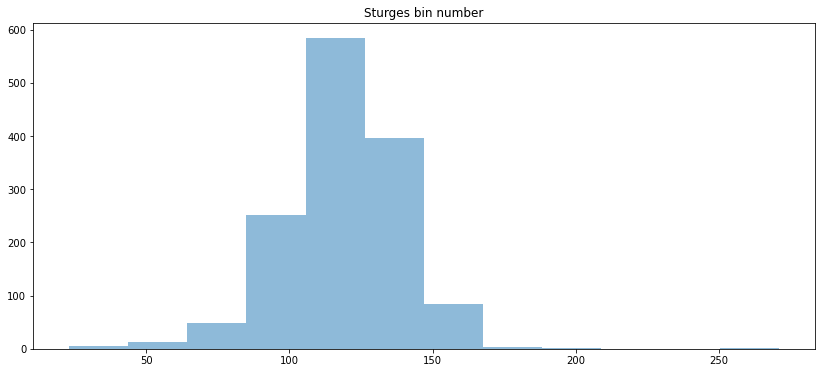

In [32]:
# Set figure size
plt.figure(figsize=(14,6))

# Plot using Sturge's binning method
plt.hist(bwght['bwght'], alpha=.5, bins="sturges")
plt.title("Sturges bin number")
plt.show()

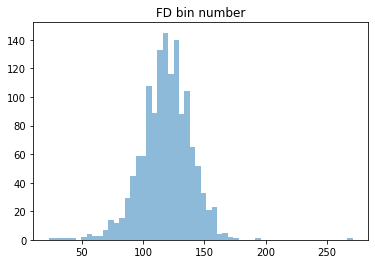

In [33]:
# Plot using FD binning method
plt.hist(bwght['bwght'], alpha=.5, bins="fd")
plt.title("FD bin number")
plt.show()

Sturge's method works well when the sample size is under 200 or when the dataset is not heavily skewed. It smoothes the data to discover patterns. But it could possibly over-smooth when facing a large dataset. 
FD's method gives a more detailed trend of the data, but it could be easily influenced by noise in the dataset because the number of bins is ralatively large.

(b) (1 point) Create a histogram of bwght and overlay a density curve.

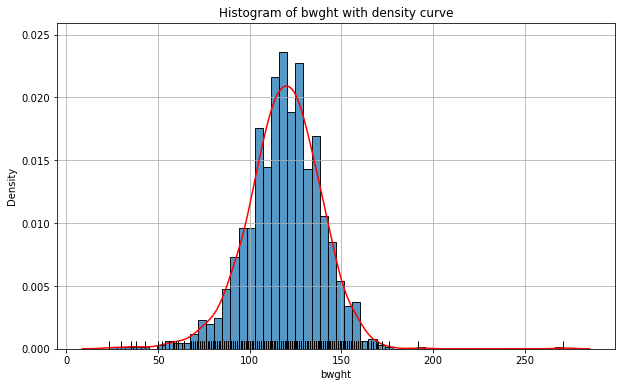

In [40]:
plt.figure(figsize=(10,6))
plt.title('Histogram of bwght with density curve')
sns.histplot(bwght.bwght, stat='density')
sns.kdeplot(bwght.bwght, color='red')
sns.rugplot(bwght.bwght, color='black')
plt.grid()

(c) (1 point) Using a q-q plot, do you believe bwght is approximately normally distributed? Why are
why not?

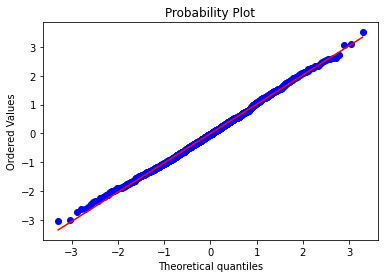

In [45]:
sample = np.random.normal(0,1,bwght.shape[0])
stats.probplot(sample, dist='norm', plot=plt)
plt.show()

As the graph shows, bwght is approximately normally distributed because there aren't many points that are deviated from the 45-degree line. Most points fall on the line. 

(d) (1 point) Create a boxplot conditioning on whether or not the mother was a smoker. Do you
observe any differences? If so, what?

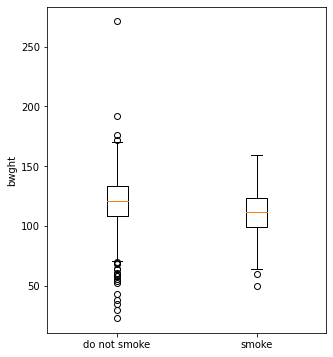

In [50]:
plt.figure(figsize=(5,6))
data = [bwght[bwght.cigs==0].bwght, bwght[bwght.cigs!=0].bwght]
plt.boxplot(data)
plt.ylabel('bwght')
plt.xticks([1,2], ['do not smoke','smoke'])
plt.show()

I observed from the boxplot above that the mother who was a smoker tends to give smaller birth weight to her baby than the mother who did not smoke. 

## 4. (4 points) Use the bwght dataset from the Wooldridge python module to answer the following question.


(a) (1 point) Estimate the parameters for the following simple regression:
ˆbwght = ˆβ0 + ˆβ1cigs.  
Report the intercept and slope. What do these tell you about the association between cigarette use and birth weight?

In [64]:
import statsmodels.formula.api as smf

reg=smf.ols('bwght~cigs', data=bwght)
results=reg.fit()
results.params

Intercept    119.771900
cigs          -0.513772
dtype: float64

The intercept tells that if the mother did not smoke(cigs=0), the model predicts that the baby weight is approximately 119.7719 ounces.
The slope tells that if the number of cigarettes smoked by the mother per day increases by 1, the model predicts the
baby weigiht will decrease by approximately 0.513772 ounces. 

(b) (1 point) What is the predicted value of birthweight when cigs = 0? When cigs = 3?

In [57]:
b0 = results.params[0]
b1 = results.params[1]

# cigs = 0
print(b0+b1*0)

# cigs = 3
print(b0+b1*3)

119.77190039834967
118.23058411987951


(c) (1 point) Verify the residuals of this regression sum (approximately) to zero.

In [62]:
# Take a look at the residuals
results.resid.head()

0       119.7719
1       119.7719
2       119.7719
3       119.7719
4       119.7719
          ...   
1383    119.7719
1384    119.7719
1385    119.7719
1386    119.7719
1387    119.7719
Length: 1388, dtype: float64

In [60]:
# Sum up residuals
results.resid.sum()

1.48929757415317e-11

I have verified that the sum of residuals is very close to 0.

(d) (1 point) Using a scatter plot, show the observed values against the values predicted by a regression.

[]

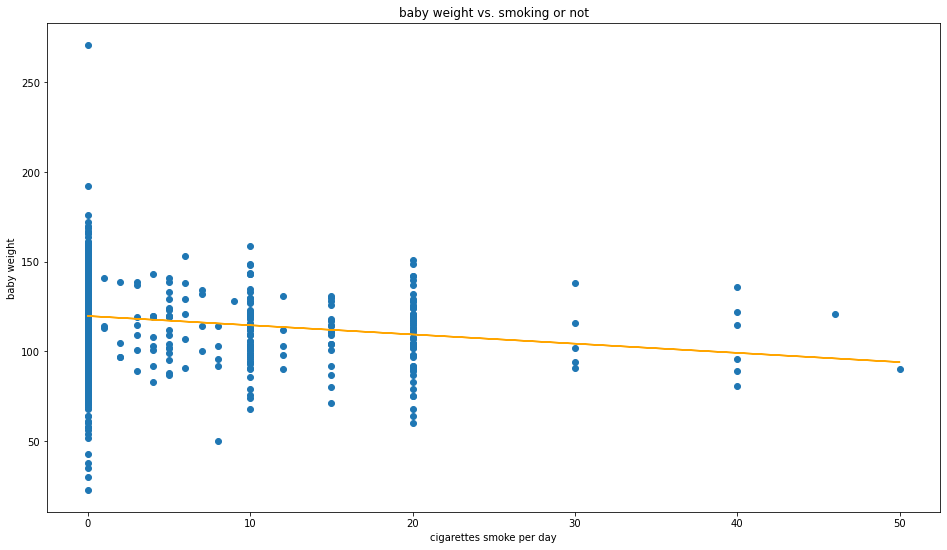

In [65]:
plt.figure(figsize=(16,9))
plt.scatter(bwght['cigs'], bwght['bwght'])
plt.plot(bwght['cigs'], results.fittedvalues, color='orange')

#add labels
plt.title('baby weight vs. smoking or not')
plt.xlabel('cigarettes smoke per day')
plt.ylabel('baby weight')

plt.plot()